In [1]:
import pandas as pd
from lib.pitch_control import plot_pitch_control, KNNPitchControl, SpearmanPitchControl, FernandezPitchControl
from lib.draw import pitch
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/all_goals.csv', low_memory=False)
df.edgecolor.fillna('white', inplace=True)
df.bgcolor.fillna('black', inplace=True)
df.sample(5)

,bgcolor,dx,dy,edgecolor,frame,play,player,player_num,team,x,y,z,coords,player_obj,num,name
30368,yellow,0.224654,1.829708e-01,black,107,Liverpool [1] - 0 Wolves,6670,NaN,defense,85.430199,26.548476,0.0,NaN,NaN,NaN,NaN
19209,red,0.000000,-2.842171e-14,white,70,Liverpool [2] - 0 Porto,8162,NaN,attack,49.387755,36.134454,0.0,NaN,NaN,NaN,NaN
47015,blue,0.091191,2.628645e-01,white,151,Genk 0 - [3] Liverpool,1635,NaN,defense,83.988180,21.691918,0.0,NaN,NaN,NaN,NaN
81496,maroon,0.243424,-3.801642e-03,darkblue,153,Barcelona 1 - [2] Real Madrid,12052,NaN,defense,61.308041,20.888894,NaN,"(359.5551450093308, 376.50754183100867)",12052.0,NaN,NaN
2025,white,0.216658,1.866147e-01,black,10,Liverpool [3] - 0 Bournemouth,1067,NaN,defense,51.275301,17.745497,0.0,NaN,NaN,NaN,NaN


In [3]:
game = df[df.play == 'Liverpool [2] - 0 Porto']
frame = game[game.frame == 100]

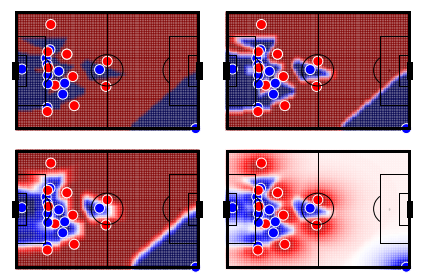

In [4]:
pc_model = KNNPitchControl()
control = pc_model.predict(frame)
plot_pitch_control(frame, pc_model.grid, control, subplot=221)

pc_model = KNNPitchControl(delays=[0], smoothing=5)
control = pc_model.predict(frame)
plot_pitch_control(frame, pc_model.grid, control, subplot=222)

pc_model = KNNPitchControl(delays=[0, 10, 20], smoothing=10)
control = pc_model.predict(frame)
plot_pitch_control(frame, pc_model.grid, control, subplot=223)

pc_model = KNNPitchControl(delays=[0, 10, 20], smoothing=5, distance_polinom=200)
control = pc_model.predict(frame)
plot_pitch_control(frame, pc_model.grid, control, subplot=224)

plt.rcParams['figure.dpi'] = 500
plt.tight_layout()

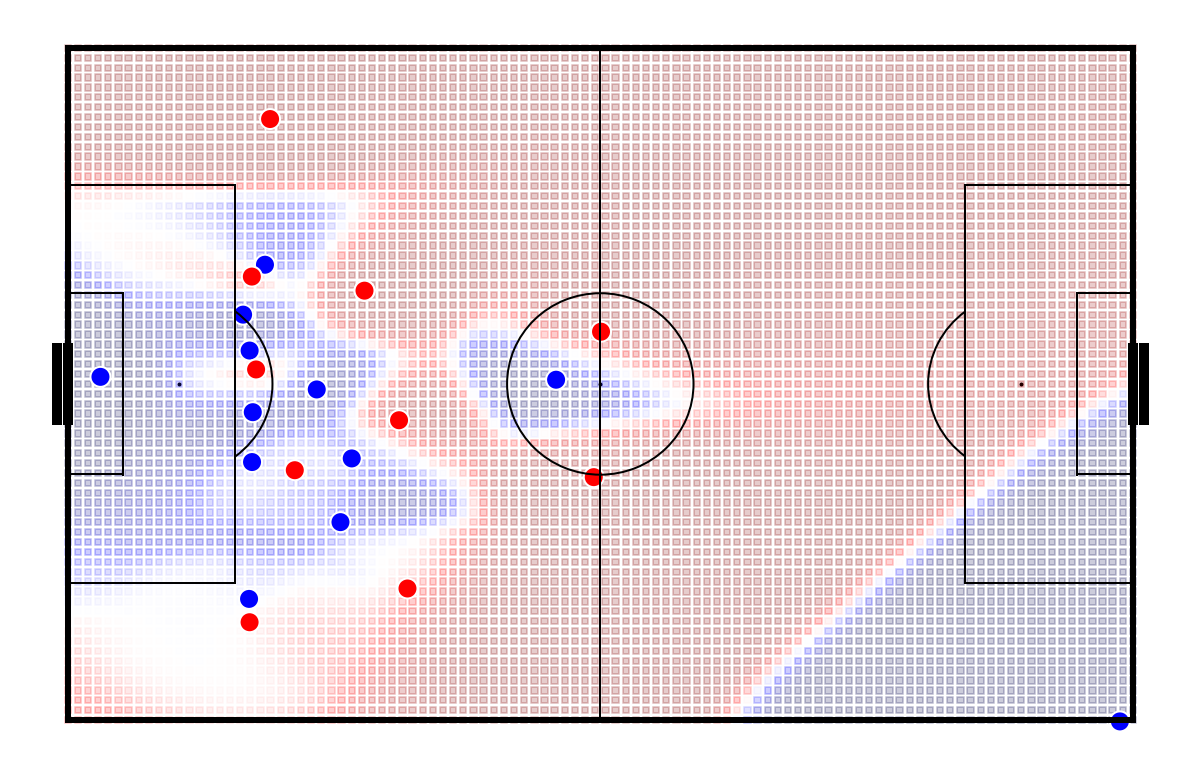

In [5]:
pc_model = SpearmanPitchControl()
control = pc_model.predict(frame)
plot_pitch_control(frame, pc_model.grid, control)

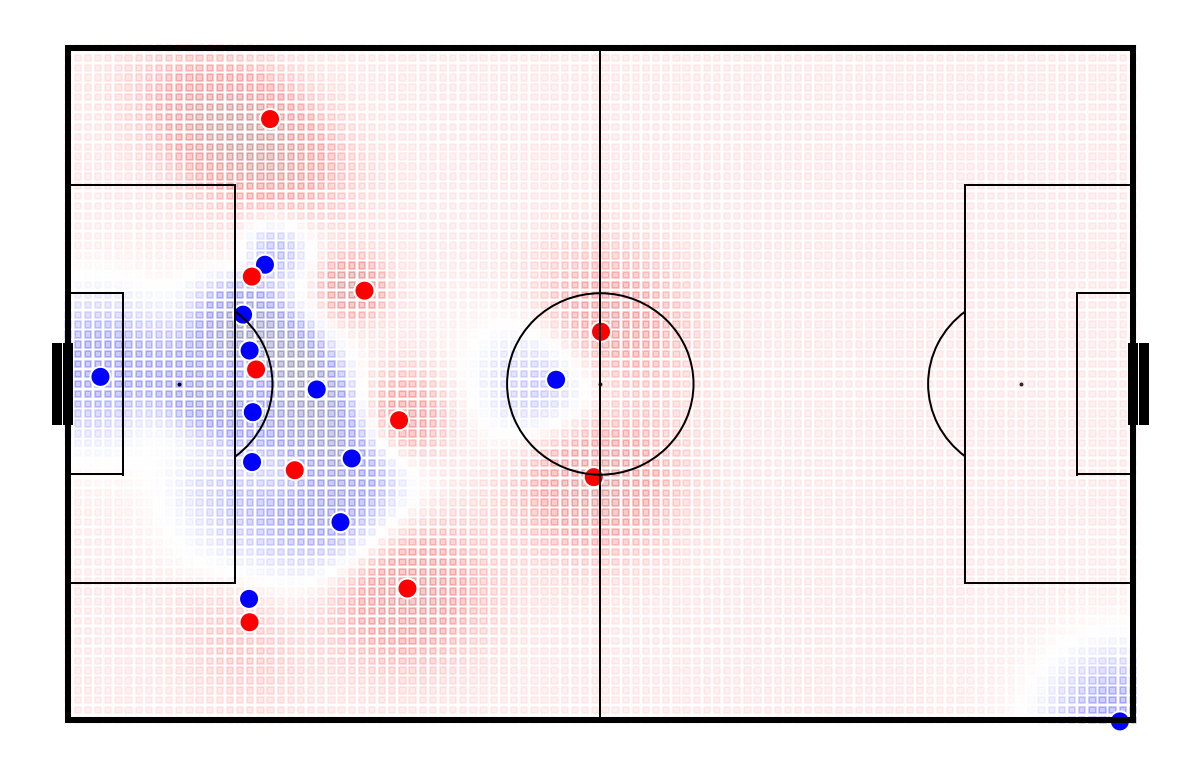

In [6]:
pc_model = FernandezPitchControl()
control = pc_model.predict(frame, game)
plot_pitch_control(frame, pc_model.grid, control)